# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Yohanes Aldo Anantha
- **Email:** aldo00931@gmail.com
- **ID Dicoding:** mc172d5y1232

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah pesanan dan total pendapatan perusahaan dalam beberapa bulan terakhir?
- Kategori produk mana yang paling banyak dan paling sedikit dipesan oleh pelanggan?
- Bagaimana distribusi pelanggan berdasarkan lokasi geografis?
- Kapan terakhir kali pelanggan melakukan pembelian?

## Import Semua Packages/Library yang Digunakan

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [101]:
customers_df = pd.read_csv("Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [102]:
geolocation_df = pd.read_csv("Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [103]:
orders_df = pd.read_csv("Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [104]:
orderItems_df = pd.read_csv("Dataset/order_items_dataset.csv")
orderItems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [105]:
orderPayments_df = pd.read_csv("Dataset/order_payments_dataset.csv")
orderPayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [106]:
product_df = pd.read_csv("Dataset/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- xxx
- xxx

### Assessing Data

####Menilai Table `customers_df`


In [107]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [108]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Tidak terdapat duplikasi data.
- Data customer memiliki 99441 baris dan 5 kolom



####Menilai Table `geolocation_df`


In [109]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [110]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [111]:
geolocation_df.groupby(by="geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=True)

geolocation_city
* cidade                   1
pau brasil                 1
patu                       1
patrocínio paulista        1
patrocínio do muriaé       1
                        ... 
rio de janeiro           404
brasília                 406
brasilia                 496
são paulo               3013
sao paulo               3171
Name: geolocation_zip_code_prefix, Length: 8011, dtype: int64

**Insight:**
- data geolocation memiliki 261831 duplikasi data
- data tidak konsisten terlihat dari penulisan kota yang berbeda seperti sao paulo dan são paulo.


####Menilai Table `orders_df`


In [112]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [113]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [114]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date , dan order_estimated_delivery_date

- Terdapat missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date

####Menilai Table `orderItems_df`


In [115]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [116]:
print("Jumlah duplikasi: ", orderItems_df.duplicated().sum())
orderItems_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Terdapat kesalahan tipe data pada kolom shipping_limit_date.
- Perlu dilakukan pemeriksaan pada kolom biaya pengiriman (freight_value) yang memiliki nilai 0 dan 409, karena nilai tersebut diindikasikan sebagai outlier.  

####Menilai Table `orderPayments_df`


In [117]:
orderPayments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [118]:
print("Jumlah duplikasi: ", orderPayments_df.duplicated().sum())
orderPayments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Data tidak memiliki duplikasi
- Kemungkinan ada transaksi besar dimana nilai rata-rata pembayaran (payment_value) = 154.1 tetapi nilai maksimumnya mencapai 103886.

####Menilai Table `product_df`


In [119]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [120]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [121]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())
product_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Terdapat Missing value pada 9 kolom  
- Berat produk (product_weight_g) memiliki nilai rata-rata = 2276(2.2 kg) tetapi nilai maksimum mencapai 40425(40.4 kg)

### Cleaning Data

####Membersihkan Tabel `geolocation_df`

In [122]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


#####Menghapus duplikasi

In [123]:
geolocation_df.duplicated().sum()

261831

In [124]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


In [125]:
geolocation_df.groupby(by="geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=True)

geolocation_city
* cidade                   1
pau brasil                 1
patu                       1
patrocínio paulista        1
patrocínio do muriaé       1
                        ... 
rio de janeiro           404
brasília                 406
brasilia                 496
são paulo               3013
sao paulo               3171
Name: geolocation_zip_code_prefix, Length: 8011, dtype: int64

In [126]:
import re
# Fungsi untuk menormalisasi nama kota
def normalize_city_name(city_name):
    city_name = city_name.lower()
    city_name = re.sub(r'[\.\-_]', '',city_name)
    city_name = city_name.replace('á', 'a').replace('é', 'e').replace('ê', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u').replace('ã', 'a').replace('õ', 'o').replace('ç', 'c').replace('*', '')
    return city_name

# Menerapkan fungsi normalisasi ke kolom geolocation_city
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].apply(normalize_city_name)
geolocation_df.groupby(by="geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=True)

geolocation_city
 cidade                  1
paraguacu paulista       1
paraguacu                1
paracuru                 1
paracambi                1
                      ... 
goiania                233
salvador               275
rio de janeiro         404
brasilia               510
sao paulo             3185
Name: geolocation_zip_code_prefix, Length: 6183, dtype: int64

In [127]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


####Membersihkan Tabel `Orders`

In [128]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#####Membersihkan Missing Value

In [129]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#####Mengubah Tipe Data


In [130]:
orders_df.dropna(inplace=True)
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [131]:
datetime_Orders = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_Orders:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


####Membersihkan Tabel `orderItems_df`

In [132]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#####Mengubah Tipe Data

In [133]:
datetime_OrderItems = ["shipping_limit_date"]
for column in datetime_OrderItems:
  orderItems_df[column] = pd.to_datetime(orderItems_df[column])

orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#####Membersihkan Outliers

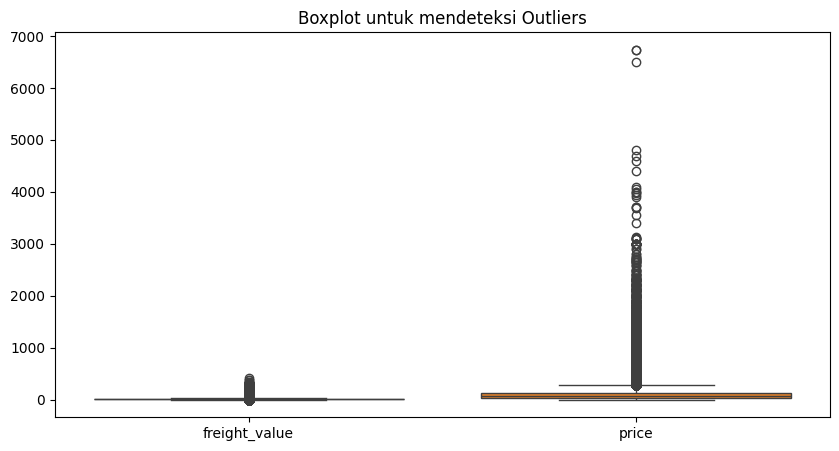

In [134]:
plt.figure(figsize=(10,5))
sns.boxplot(data=orderItems_df[['freight_value', 'price']])
plt.title('Boxplot untuk mendeteksi Outliers')
plt.show()

C:\Users\YOHANES ALDO\AppData\Local\Temp\ipykernel_14256\1887345910.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  orderItems_df.drop(orderItems_df[kondisi_more_than].index, inplace=True)


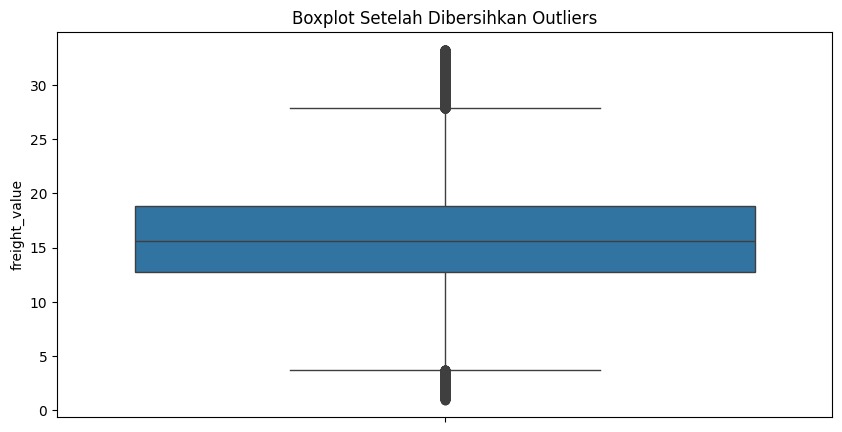

In [135]:
Q1 = (orderItems_df['freight_value']).quantile(0.25)
Q3 = (orderItems_df['freight_value']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = orderItems_df['freight_value'] < minimum
kondisi_more_than = orderItems_df['freight_value'] > maximum

orderItems_df.drop(orderItems_df[kondisi_lower_than].index, inplace=True)
orderItems_df.drop(orderItems_df[kondisi_more_than].index, inplace=True)


plt.figure(figsize=(10,5))
sns.boxplot(data=orderItems_df['freight_value'])
plt.title('Boxplot Setelah Dibersihkan Outliers')
plt.show()

####Membersihkan `Tabel OrderPayments_df`

In [136]:
orderPayments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


#####Membersihkan Outliers

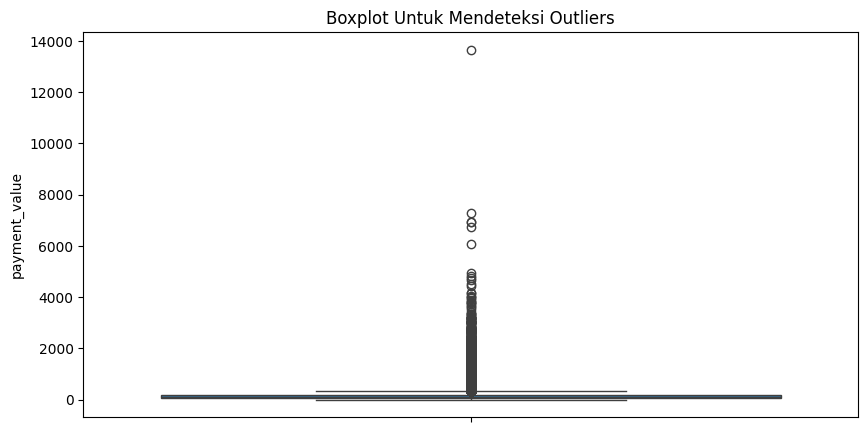

In [137]:
plt.figure(figsize=(10,5))
sns.boxplot(data=orderPayments_df['payment_value'])
plt.title('Boxplot Untuk Mendeteksi Outliers')
plt.show()

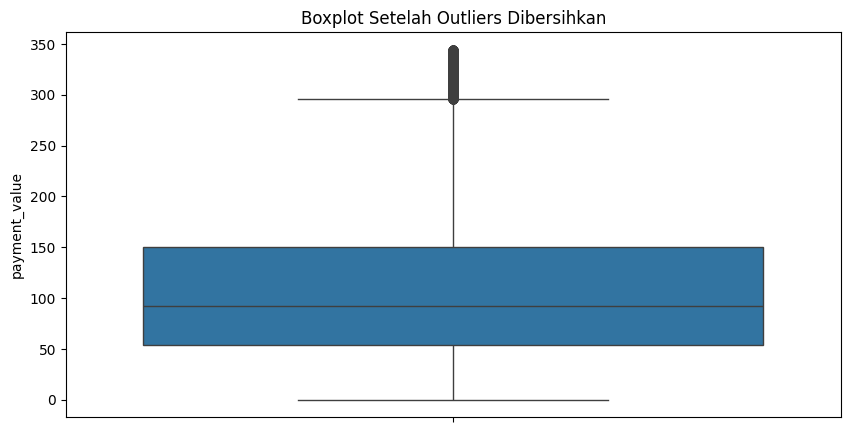

In [138]:
Q1 = (orderPayments_df['payment_value']).quantile(0.25)
Q3 = (orderPayments_df['payment_value']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = orderPayments_df['payment_value'] < minimum
kondisi_more_than = orderPayments_df['payment_value'] > maximum

orderPayments_df.drop(orderPayments_df[kondisi_lower_than].index, inplace=True)
orderPayments_df.drop(orderPayments_df[kondisi_more_than].index, inplace=True)

plt.figure(figsize=(10,5))
sns.boxplot(data=orderPayments_df['payment_value'])
plt.title('Boxplot Setelah Outliers Dibersihkan')
plt.show()

####Membersihkan Tabel `product_df`

In [139]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#####Membersihkan Missing Value

In [140]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [141]:
product_df.dropna(inplace=True)
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#####Membersihkan Outliers

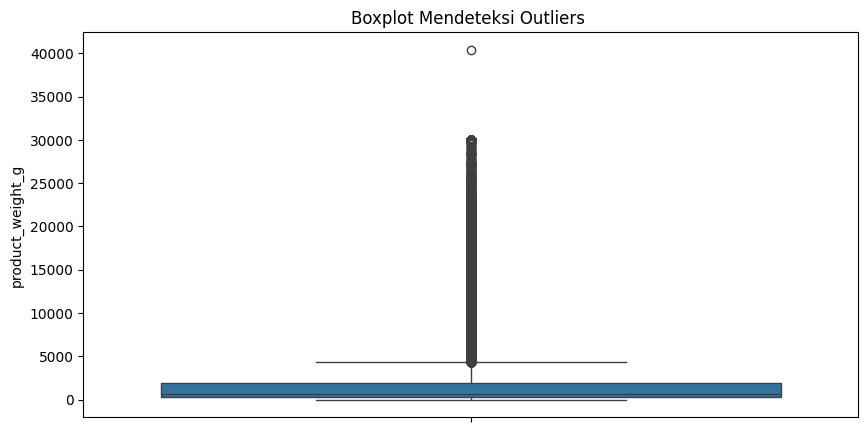

In [142]:
plt.figure(figsize=(10,5))
sns.boxplot(data=product_df['product_weight_g'])
plt.title('Boxplot Mendeteksi Outliers ')
plt.show()

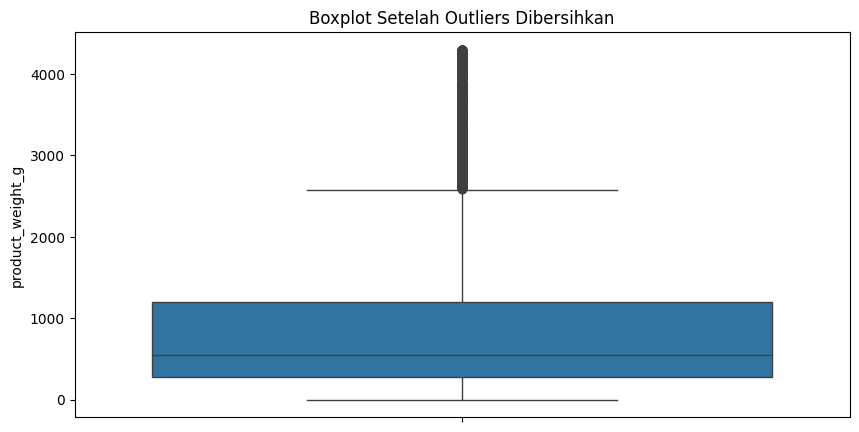

In [143]:
Q1 = (product_df['product_weight_g']).quantile(0.25)
Q3 = (product_df['product_weight_g']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = product_df['product_weight_g'] < minimum
kondisi_more_than = product_df['product_weight_g'] > maximum

product_df.drop(product_df[kondisi_lower_than].index, inplace=True)
product_df.drop(product_df[kondisi_more_than].index, inplace=True)

plt.figure(figsize=(10,5))
sns.boxplot(data=product_df['product_weight_g'])
plt.title('Boxplot Setelah Outliers Dibersihkan')
plt.show()

**Insight**
- Beberapa data yang memiliki outliers sudah dibersihkan tetapi tetap memiliki sedikit outliers.
- Rata-rata data yang dipakai memiliki missing value

## Exploratory Data Analysis (EDA)

#### Explore `customer_df`

In [144]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
65253,ed110cb97194f4281568a16d130589f8,ca0e20ade97bc751496dfc450afe397b,13214,jundiai,SP
29675,fc0505a97dd36f988806bba5178aef83,cab88505ad6b31d02081fa42b34c1d24,38720,lagoa formosa,MG
6943,6af03066082921bc62c125b085440b76,55686a9ed1bd3d5603eea2a0b801455b,18090,sorocaba,SP
19944,e9195926b82fbae50a32827fdcfd42f1,befd3bac1f21bc3a2131be66811360b5,83410,colombo,PR
29981,8ac12be4103f6d1ad36d0c21efc8fd5f,fa58e11c149d7e903dbe5f6c854277e7,98780,santa rosa,RS


In [145]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [146]:
customers_df.customer_id.is_unique

True

In [147]:
customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [148]:
customers_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Insight:**
- xxx
- xxx

####Explore `geolocation_df`




In [149]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
860267,83280,-25.898228,-48.571003,guaratuba,PR
671341,40270,-12.972408,-38.490680,salvador,BA
530013,29144,-20.303101,-40.366037,cariacica,ES
18747,1531,-23.572371,-46.631805,sao paulo,SP
815227,76907,-10.860131,-61.962889,jiparana,RO


In [150]:
geolocation_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,6183,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,99645,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [151]:
geolocation_df.geolocation_zip_code_prefix.is_unique

False

In [152]:
geolocation_df.geolocation_zip_code_prefix.duplicated().sum()

719317

In [153]:
geolocation_df.groupby(by="geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

geolocation_city
sao paulo         3185
brasilia           510
rio de janeiro     404
salvador           275
goiania            233
                  ... 
guaiba               1
guaianas             1
guadalupe            1
guacui               1
ângulo               1
Name: geolocation_zip_code_prefix, Length: 6183, dtype: int64

####Explore `customer_df` & `geolocation_df`

In [154]:
geolocation_customer_df = pd.merge(
    left=customers_df,
    right=geolocation_df,
    how='left',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)
geolocation_customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.515413,-47.398194,franca,SP


In [155]:
geolocation_customer_df.groupby(by='geolocation_city').customer_id.nunique().sort_values(ascending=False)

geolocation_city
sao paulo                  15618
rio de janeiro              6923
belo horizonte              2789
brasilia                    1964
curitiba                    1524
                           ...  
centralina                     1
centro novo do maranhao        1
cerejeiras                     1
isaias coelho                  1
campinacu                      1
Name: customer_id, Length: 4380, dtype: int64

####Explore `orders_df`

In [156]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
48465,767595f6cbb3f45f3d3fced0aecc7fed,971928f2e125b0d9b0d51e24b0c682eb,delivered,2018-01-18 15:57:06,2018-01-18 16:16:27,2018-01-19 22:13:44,2018-02-09 15:35:08,2018-02-19
84422,3d46adb746f95277b8567c00b7bbfc22,00efd0bb67f3af4d73269668a6cc8b49,delivered,2018-05-11 01:46:56,2018-05-11 02:18:11,2018-05-11 13:22:00,2018-05-16 22:58:49,2018-05-21
42034,76cd8bdf29b1ad8f6dad715d6ad8fe90,f3ea766418f91a35a84d530bae7787ff,delivered,2017-05-10 13:17:10,2017-05-10 13:30:16,2017-05-11 12:24:29,2017-05-30 09:42:28,2017-06-01
59534,89df20c6ed881fc9d841a717c76a212b,dc0601b04f43f219b2cefc8025fe4673,delivered,2017-06-16 10:33:12,2017-06-17 10:25:15,2017-06-20 10:54:02,2017-06-21 18:06:29,2017-06-29
42225,3a7fcc00c5d5f8bd9daf0c246bd93a54,abb4bba6c51db8e00607f28f0af2e448,delivered,2018-01-21 14:07:04,2018-01-22 13:50:47,2018-01-23 20:57:43,2018-01-29 23:56:57,2018-02-15


In [157]:
orders_df.order_id.is_unique

True

In [158]:
delivery_day =  orders_df['order_delivered_customer_date']- orders_df['order_delivered_carrier_date']
delivery_day = delivery_day.dt.days
orders_df['delivery_day'] = delivery_day
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1


In [159]:
print('Waktu pengiriman paling lama adalah ',orders_df['delivery_day'].max(), 'hari')

Waktu pengiriman paling lama adalah  205 hari


In [160]:
orders_df.groupby(by='order_status').customer_id.count()

order_status
canceled         6
delivered    96455
Name: customer_id, dtype: int64

In [161]:
orders_df[orders_df.order_status == 'canceled']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_day
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09,29
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,3
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29,3
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30,4
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,13
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08,26


####Explore `orders_df` & `customers_df`

#####Menggabungkan data `customers_df` dan `orders_df`

In [162]:
orders_customer_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
orders_customer_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [163]:
orders_customer_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15044
rio de janeiro            6603
belo horizonte            2697
brasilia                  2071
curitiba                  1489
campinas                  1406
porto alegre              1341
salvador                  1188
guarulhos                 1143
sao bernardo do campo      911
Name: customer_id, dtype: int64

In [164]:
orders_customer_df.groupby(by='order_status').customer_id.nunique().sort_values(ascending=False).head(10)

order_status
delivered    96455
canceled         6
Name: customer_id, dtype: int64

####Explore `orderItems_df`

In [165]:
orderItems_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1715,03edbc910db946c979e09e67eb6a0d9f,1,fb69f3c3b63f63da92e215ddf61e0b01,218d46b86c1881d022bce9c68a7d4b15,2017-12-28 07:17:58,91.00,12.98
70420,a0b49a0330e926df75d422934cc90cf8,1,a7c73814e6894bc049f7aac7d37f7175,6f892e20a171e98efe17fdb971ff319b,2017-08-13 21:45:11,254.90,27.06
72077,a46ca44d1b7cf49a346dbab87d2344ac,1,25d6edcd216a9ee579f19f92d694f7d5,b76dba6c951ab00dc4edf0a1aa88037e,2017-07-25 17:50:26,12.97,15.10
99246,e127e496849462216ba78b6dfe0c48ed,3,53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,2018-05-09 04:12:48,53.90,3.21
92274,d16083ed35e57acd01a5ce52c16e5349,1,688ad0169550f8e2eb0307b61df3ba12,640e21a7d01df7614a3b4923e990d40c,2018-07-23 02:42:33,66.55,23.27


In [166]:
orderItems_df.sort_values(by='price', ascending=False).head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
59137,86c4eab1571921a6a6e248ed312f5a5a,1,6902c1962dd19d540807d0ab8fade5c6,fa1c13f2614d7b5c4749cbc52fecda94,2017-03-23 20:08:04,3999.90,17.01
83291,bd2fef198085db0b586b9c71aa2d35da,1,470433f95ba906e17efac3fce39e9ffd,e2a1ac9bf33e5549a2a4f834e70df2f8,2017-04-04 02:15:16,2999.89,24.19
38895,586992f50ed97898737b07970376d19c,1,8b502ca34e28d30605bc667b965b6abf,fa1c13f2614d7b5c4749cbc52fecda94,2017-02-04 17:01:46,2999.00,17.01
23765,362aa88dd1265e7b4ea491b5836fb5f6,1,d7324d4c913e7b424cb61675dafc8c10,6750d71153f00fc58829af2a8ef1bcf1,2017-05-23 02:10:12,2799.00,28.00
91987,d0bce34c31d4494a153aa82c468152c4,1,122bedead6e7541d311e6e0ab3cf248f,961dff0a659b4561334372337dd897d9,2017-06-12 19:45:17,2649.00,32.29
15815,242800e82e3e3f0aca252d6e03e4564c,1,1ed724b5e4b638eeb4bd3487d88b8f28,961dff0a659b4561334372337dd897d9,2017-06-09 09:30:14,2649.00,32.29
110583,fb441bffe443e71cb16477c4743591e8,1,5263b67de8e3edbade45ea923f6c4e79,70eea00b476a314817cefde4aad4f89a,2017-03-22 13:05:58,2600.00,26.07
62453,8ea7aebc18842332aad5f41ca74b334c,1,3ecf69ee1fe21cfd40b30cbea549e563,59417c56835dd8e2e72f91f809cd4092,2017-04-19 13:25:19,2589.00,32.29
53081,78ce53a063eb2907f9727aac2c678339,1,3ecf69ee1fe21cfd40b30cbea549e563,59417c56835dd8e2e72f91f809cd4092,2017-04-25 21:22:51,2589.00,17.01
29952,4412d97cb2093633afa85f11db46316c,1,993ac19aa975075775c16ba15426f8be,9803a40e82e45418ab7fb84091af5231,2018-05-29 02:55:11,2499.75,12.00


In [167]:
orderItems_df.groupby(by="order_item_id").agg({
    "product_id": "nunique",
    "price":  ["min", "max"]
})

product_id price         
                 nunique   min      max
order_item_id                          
1                  28951  0.85  3999.90
2                   5572  0.85  2200.00
3                   1626  1.20  1790.00
4                    732  1.20  1790.00
5                    351  1.20  1680.00
6                    210  1.20  1680.00
7                     45  1.20  1680.00
8                     27  1.20  1680.00
9                     22  1.20   284.99
10                    19  1.20   284.99
11                    16  1.20   108.00
12                    13  1.20   108.00
13                     8  1.20   100.00
14                     7  1.20   100.00
15                     5  1.20   100.00
16                     3  1.20   100.00
17                     3  1.20   100.00
18                     3  1.20   100.00
19                     3  1.20   100.00
20                     3  1.20   100.00
21                     1  7.80     7.80

####Explore `orderPayments_df`

In [168]:
orderPayments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
17339,c87d7a80e2ec732b00980f3ea7961603,1,credit_card,4,315.84
1939,677b1a4dd9c69ee17aafc0d2b33af06d,1,credit_card,8,85.60
16841,a91c3d9045c21f1f101bfc28c30fbef6,1,credit_card,4,232.89
61178,b4c5ff803ab75f16ce38e62e25cab043,1,boleto,1,265.16
29155,86c1a1c5de6b99e0aed1e7f053862ff9,1,boleto,1,44.59


In [169]:
orderPayments_df.sort_values(by='payment_value', ascending=False).head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
56273,ee9f6e9060450329e05aef3781e5ed38,1,credit_card,5,344.34
37829,a00de27f9585ad0dcde9842ad65a43a7,1,credit_card,2,344.33
48548,b2aadb128e84058f8ff560dbe7466c1c,1,boleto,1,344.33
34761,c7c6a739a8443d84f8be2528afc84d43,1,credit_card,8,344.32
42873,2e8a59579f027832343436a97c22499b,1,boleto,1,344.32
96133,0212767fce39149bfc2e12d54be96f65,1,boleto,1,344.32
10795,8081c44895cefcfebc13faec5c9ed8bf,1,credit_card,5,344.28
8719,d807318c6ed8193c569cad0f755131fa,1,credit_card,8,344.27
79106,f5de15fee5da7c522b0aa5837f99a1db,1,boleto,1,344.26
19333,c887294d29ae18c8f8cdfa478a4a36b2,1,credit_card,8,344.23


In [170]:
orderPayments_df.groupby(by='payment_type').order_id.count().sort_values(ascending=False)

payment_type
credit_card    70269
boleto         18504
voucher         5685
debit_card      1444
not_defined        3
Name: order_id, dtype: int64

In [171]:
orderPayments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value" : ["min", "max"]
}).sort_values(by=('order_id', 'nunique'), ascending=False)

order_id payment_value        
              nunique           min     max
payment_type                               
credit_card     70031          0.01  344.34
boleto          18504         11.62  344.33
voucher          3792          0.00  341.02
debit_card       1443         13.38  340.07
not_defined         3          0.00    0.00

####Explore `orderPayments_df` & `orders_df`

#####Menggabungkan `orderPayments_df` & `orders_df`

In [172]:
orderPayments_orders_df = pd.merge(
    left=orderPayments_df,
    right=orders_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
orderPayments_orders_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_day
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,7.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,1.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,2.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,13.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,10.0


In [173]:
orderPayments_orders_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "delivery_day" : ["min", "max"],
    "payment_value" : ["min", "max"]
}).sort_values(by=('order_id', 'nunique'), ascending=False)

order_id delivery_day        payment_value        
              nunique          min    max           min     max
payment_type                                                   
credit_card     70031        -17.0  205.0          0.01  344.34
boleto          18504         -3.0  195.0         11.62  344.33
voucher          3792         -7.0  171.0          0.00  341.02
debit_card       1443          0.0   72.0         13.38  340.07
not_defined         3          NaN    NaN          0.00    0.00

####Explore `product_df`

In [174]:
product_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32218,93b67da06834e15a3594134d43ee4ebe,eletrodomesticos,39.0,669.0,1.0,1200.0,28.0,8.0,13.0
31436,796f3b99d54fc73792f722557dd199d1,esporte_lazer,43.0,620.0,5.0,917.0,34.0,18.0,38.0
22466,b044bda7bc05cc5cf14d4969fda159cb,brinquedos,52.0,575.0,1.0,400.0,19.0,9.0,18.0
6691,65bb1c5a918d2876d7a0262774887d86,moveis_decoracao,60.0,953.0,7.0,900.0,32.0,17.0,30.0
32357,cb5cdff97335d1ce76e991fb9cb2adb8,moveis_decoracao,56.0,428.0,1.0,4100.0,43.0,26.0,43.0


In [175]:
product_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "product_weight_g": ["min", "max"]
}).head()

product_id product_weight_g        
                             nunique              min     max
product_category_name                                        
agro_industria_e_comercio         44             50.0  4050.0
alimentos                         79             75.0  3350.0
alimentos_bebidas                 98             50.0  4200.0
artes                             49            100.0  3400.0
artes_e_artesanato                18            100.0  2900.0

In [176]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head()

product_category_name
cama_mesa_banho          2651
esporte_lazer            2565
beleza_saude             2343
moveis_decoracao         2174
utilidades_domesticas    1865
Name: product_id, dtype: int64

####Explore `product_df` & `orderItems_df`

#####Menggabungkan `product_df` & `orderItems_df`

In [177]:
product_orderItems_df = pd.merge(
    left=product_df,
    right=orderItems_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
product_orderItems_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [178]:
product_orderItems_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "price" : ["min", "max"]
}).sort_values(by=('product_id', 'nunique'), ascending=False)

product_id   price         
                             nunique     min      max
product_category_name                                
cama_mesa_banho                 2651    6.99   629.90
esporte_lazer                   2565    4.50  1799.00
beleza_saude                    2343    1.20  1850.00
moveis_decoracao                2174    4.90   629.90
utilidades_domesticas           1865    3.06  1009.90
...                              ...     ...      ...
casa_conforto_2                    5   12.90   219.99
moveis_colchao_e_estofado          4  110.00   249.00
pc_gamer                           3  129.99   239.00
seguros_e_servicos                 2  100.00   183.29
cds_dvds_musicais                  1   45.00    65.00

[73 rows x 3 columns]

####Explore All Data

#####Menggabungkan semua data

In [179]:
merged_1 = geolocation_customer_df.merge(orderPayments_orders_df, on='customer_id')
alldata = merged_1.merge(product_orderItems_df, on='order_id')
alldata.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,4534.0,-23.584547,-46.674561,sao paulo,SP,...,3.0,100.0,16.0,3.0,13.0,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78
1,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,4534.0,-23.583566,-46.671051,sao paulo,SP,...,3.0,100.0,16.0,3.0,13.0,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78
2,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,4534.0,-23.583486,-46.670741,sao paulo,SP,...,3.0,100.0,16.0,3.0,13.0,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78
3,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,4534.0,-23.586131,-46.680689,sao paulo,SP,...,3.0,100.0,16.0,3.0,13.0,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78
4,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,4534.0,-23.584547,-46.674561,sao paulo,SP,...,3.0,100.0,16.0,3.0,13.0,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78


In [180]:
alldata.groupby(by=["customer_city", "product_category_name"]).agg({
    "customer_id" : "nunique",
    "price" : "sum"
}).sort_values(by="price", ascending=False)

customer_id  \
customer_city                product_category_name                            
rio de janeiro               cama_mesa_banho                            617   
sao paulo                    cama_mesa_banho                           1441   
                             beleza_saude                              1372   
rio de janeiro               beleza_saude                               429   
                             esporte_lazer                              428   
...                                                                     ...   
jacuipe                      telefonia                                    1   
tuparece                     telefonia                                    1   
rio paranaiba                telefonia_fixa                               1   
hortolandia                  construcao_ferramentas_construcao            1   
polo petroquimico de triunfo papelaria                                    1   

                                                                     price  
customer_city                product_category_name                          
rio de janeiro               cama_mesa_banho                    8423844.11  
sao paulo                    cama_mesa_banho                    6621790.69  
                             beleza_saude                       6079549.43  
rio de janeiro               beleza_saude                       5987164.14  
                             esporte_lazer                      5954442.86  
...                                                                    ...  
jacuipe                      telefonia                               13.98  
tuparece                     telefonia                               13.50  
rio paranaiba                telefonia_fixa                          10.99  
hortolandia                  construcao_ferramentas_construcao       10.20  
polo petroquimico de triunfo papelaria                                5.60  

[19454 rows x 2 columns]

In [181]:
#Menggunakan 300rb sampel baris data untuk memaksimalkan memori saat commit ke github 
alldata['order_purchase_timestamp'] = pd.to_datetime(alldata['order_purchase_timestamp'], errors='coerce')
alldata['year'] = alldata['order_purchase_timestamp'].dt.year
alldata = alldata.head(300000)

# Hapus kolom yang tidak diperlukan (pastikan kolom ini ada dalam dataset)
unused_columns = [
    "geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng",
    "product_name_lenght", "product_description_lenght", "product_photos_qty",
    "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm",
    "order_approved_at", "order_delivered_carrier_date", "customer_unique_id",
    "customer_zip_code_prefix", "seller_id", "shipping_limit_date",
    "payment_installments", "payment_sequential", "geolocation_city",
    "geolocation_state", "product_id", "payment_type", "price",
    "freight_value", "order_status", "customer_state", "order_estimated_delivery_date","delivery_day", "order_item_id","year","month"
]


alldata = alldata.drop(columns=[col for col in unused_columns if col in alldata.columns])

alldata.to_csv("alldata.csv", index=False)

**Insight**
- Kartu kredit adalah metode pembayaran yang paling sering digunakan, menunjukkan preferensi pelanggan terhadap transaksi non-tunai.
-  Sebagian besar pelanggan berasal dari kota-kota besar seperti rio de jainero, sao paulo dsb, yang menunjukkan pasar utama bagi bisnis.
- Beberapa kategori produk seperti cama_mesa_banho paling laris dikota rio de jainero

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana tren jumlah pesanan dan total pendapatan perusahaan dalam beberapa bulan terakhir?

In [182]:
alldata.sample(5)

,customer_id,customer_city,order_id,payment_value,order_purchase_timestamp,order_delivered_customer_date,product_category_name
177725,dae09add1fb0749dd2deb3555fb5ff52,belo horizonte,05f5cfec67106e59d6280f62c4792d25,65.35,2018-07-26 10:20:44,2018-07-30 20:32:15,cama_mesa_banho
110329,60582a6628af83a283474d8c94e3ff7a,pedro leopoldo,4ceb9336411700f9568db2ef11bda594,218.08,2017-01-19 22:41:52,2017-01-26 13:57:59,bebes
185394,7dc0e5a1cd93b2037b5705566f784f8c,sao paulo,98c398503085e37d1c5da3e29980ee25,234.79,2018-02-12 11:44:29,2018-02-22 02:08:51,ferramentas_jardim
128674,3d64967ab5012122e071d526a18038d1,juiz de fora,09816d25300df1b7cc5c78edc96f55da,206.68,2017-12-23 21:58:49,2018-01-06 15:42:25,cama_mesa_banho
163294,bfab3ce69efcd5ed27377833a86bd7e0,belo horizonte,b39662e0f09931c6e3d392e873207658,128.95,2017-08-28 13:38:01,2017-09-01 22:42:17,malas_acessorios


In [183]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1


In [184]:
df_2018 = alldata[alldata["order_purchase_timestamp"].dt.year == 2018]
monthly_orders_df = df_2018.resample(rule='M', on="order_purchase_timestamp").agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
monthly_orders_df.head()

C:\Users\YOHANES ALDO\AppData\Local\Temp\ipykernel_14256\1715171990.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = df_2018.resample(rule='M', on="order_purchase_timestamp").agg({


,order_purchase_timestamp,order_count,revenue
0,January,146,2680673.80
1,February,162,2059394.35
2,March,146,2145727.58
3,April,153,1874203.97
4,May,185,2563974.12


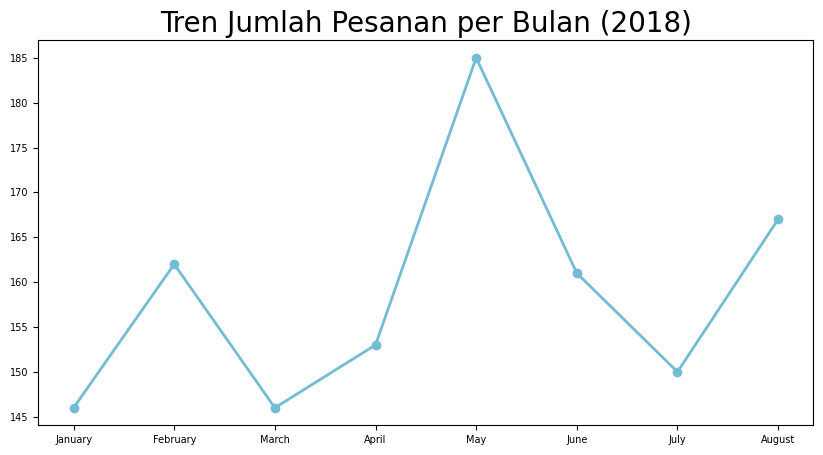

In [185]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["order_count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Tren Jumlah Pesanan per Bulan (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

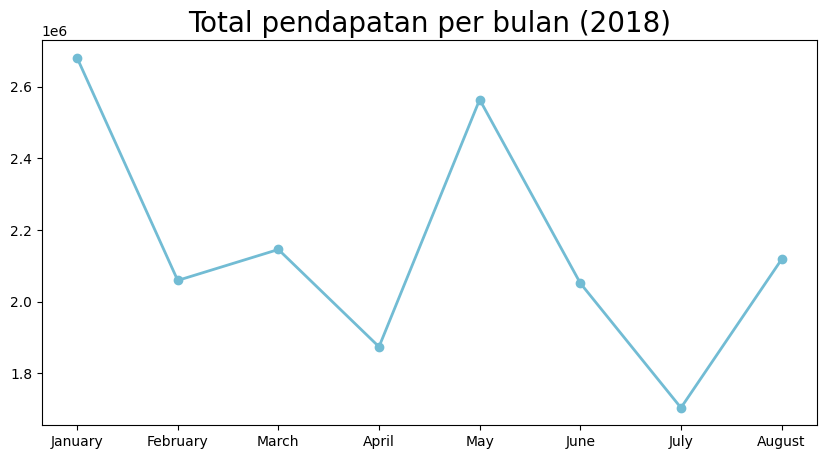

In [186]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total pendapatan per bulan (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2:Kategori produk mana yang paling banyak dan paling sedikit dipesan oleh pelanggan?

In [187]:
sum_category_orders = alldata.groupby("product_category_name")["order_id"].count().reset_index()
sum_category_orders.columns = ["product_category_name", "order_count"]

sum_category_orders = sum_category_orders.sort_values(by="order_count", ascending=False)

sum_category_orders.head()



,product_category_name,order_count
12,cama_mesa_banho,38839
10,beleza_saude,26962
28,esporte_lazer,24437
44,moveis_decoracao,22911
59,utilidades_domesticas,21042


C:\Users\YOHANES ALDO\AppData\Local\Temp\ipykernel_14256\1360723109.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_category_orders["product_category_name"],
C:\Users\YOHANES ALDO\AppData\Local\Temp\ipykernel_14256\1360723109.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bottom_10_category_orders["product_category_name"],


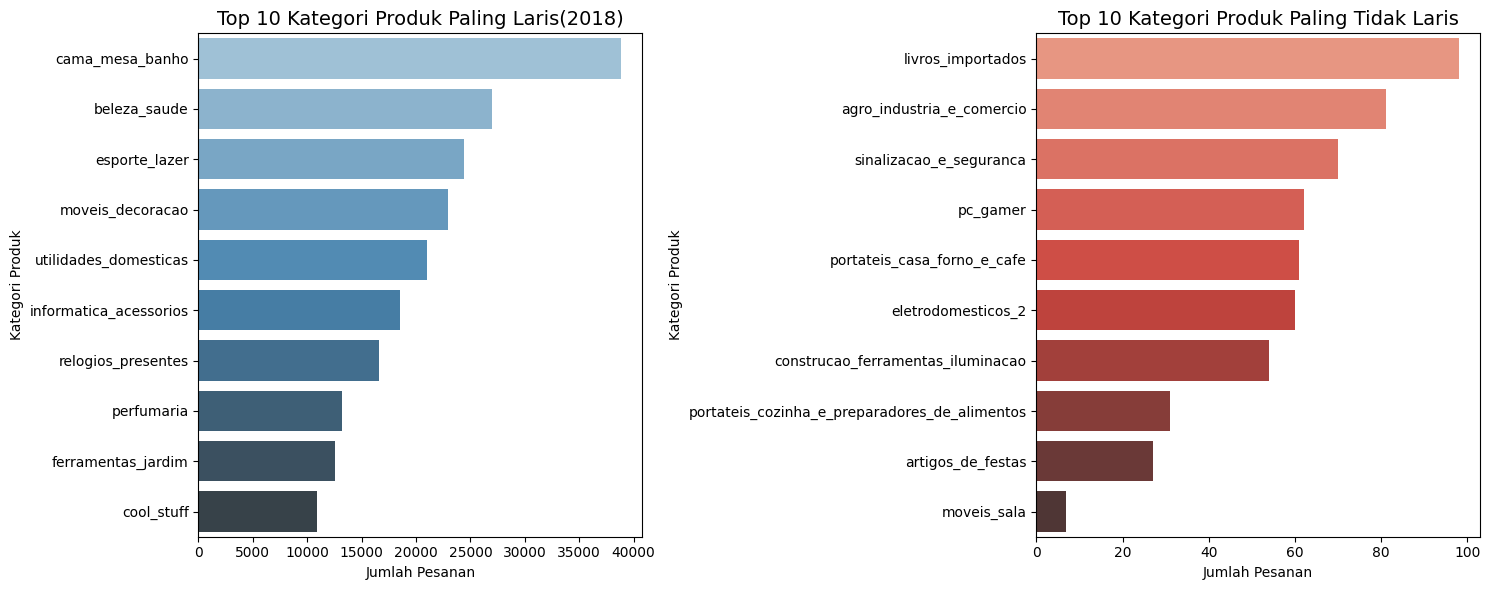

In [188]:
top_10_category_orders = sum_category_orders.head(10)
bottom_10_category_orders = sum_category_orders.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Produk Terlaris
sns.barplot(y=top_10_category_orders["product_category_name"], 
            x=top_10_category_orders["order_count"], 
            palette="Blues_d", 
            ax=axes[0])
axes[0].set_title("Top 10 Kategori Produk Paling Laris(2018)", fontsize=14)
axes[0].set_xlabel("Jumlah Pesanan")
axes[0].set_ylabel("Kategori Produk")

# Plot Produk Tidak Laris
sns.barplot(y=bottom_10_category_orders["product_category_name"], 
            x=bottom_10_category_orders["order_count"], 
            palette="Reds_d", 
            ax=axes[1])
axes[1].set_title("Top 10 Kategori Produk Paling Tidak Laris", fontsize=14)
axes[1].set_xlabel("Jumlah Pesanan")
axes[1].set_ylabel("Kategori Produk")

# Menampilkan plot
plt.tight_layout()
plt.show()

### Pertanyaan 3:Bagaimana distribusi pelanggan berdasarkan lokasi geografis?

In [189]:
customers_distribution = alldata["customer_city"].value_counts().reset_index()
customers_distribution.columns = ['customer_city', 'total customers']

customers_distribution.head()

,customer_city,total customers
0,sao paulo,24494
1,rio de janeiro,23903
2,belo horizonte,15287
3,niteroi,8403
4,curitiba,4677


C:\Users\YOHANES ALDO\AppData\Local\Temp\ipykernel_14256\57882963.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customers_distribution["total customers"].head(10), y=customers_distribution["customer_city"].head(10), palette="mako")


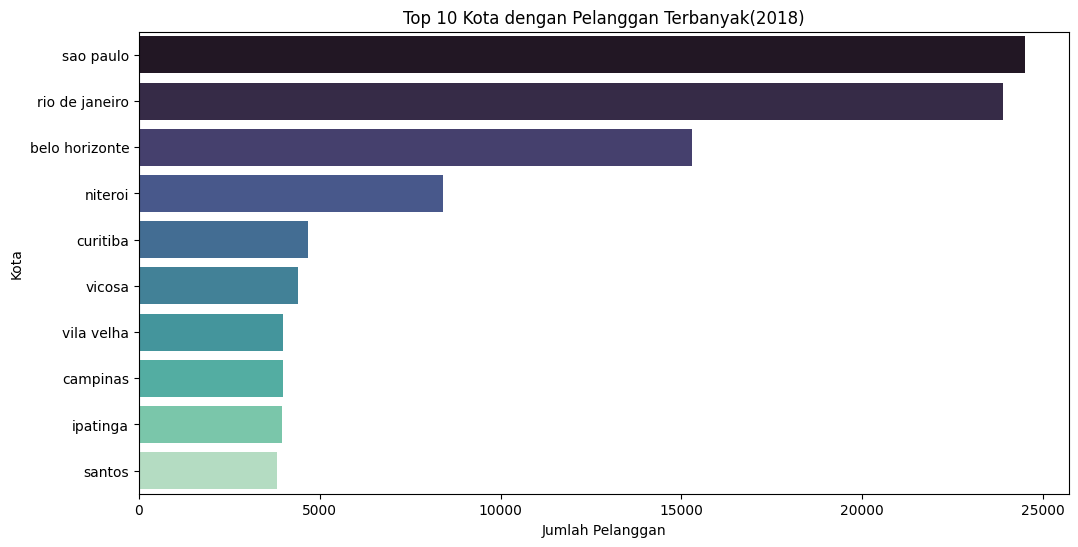

In [190]:
plt.figure(figsize=(12, 6))
sns.barplot(x=customers_distribution["total customers"].head(10), y=customers_distribution["customer_city"].head(10), palette="mako")
plt.title("Top 10 Kota dengan Pelanggan Terbanyak(2018)")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Kota")
plt.show()

### Pertanyaan 4:Kapan terakhir kali pelanggan melakukan pembelian?

In [191]:
alldata["order_purchase_timestamp"] = pd.to_datetime(alldata["order_purchase_timestamp"])
last_purchase = alldata.groupby("customer_id")["order_purchase_timestamp"].max().reset_index()
last_purchase.head()

,customer_id,order_purchase_timestamp
0,001051abfcfdbed9f87b4266213a5df1,2018-05-30 09:19:31
1,0013280441d86a4f7a8006efdaf1b0fe,2018-01-08 02:35:36
2,00146ad30454993879adaa91c518f68c,2018-01-08 20:40:57
3,0089c34393989276de67746531e0df21,2017-10-17 22:31:03
4,009bd844996868ab5166ade7dd9ab471,2018-02-13 18:07:47


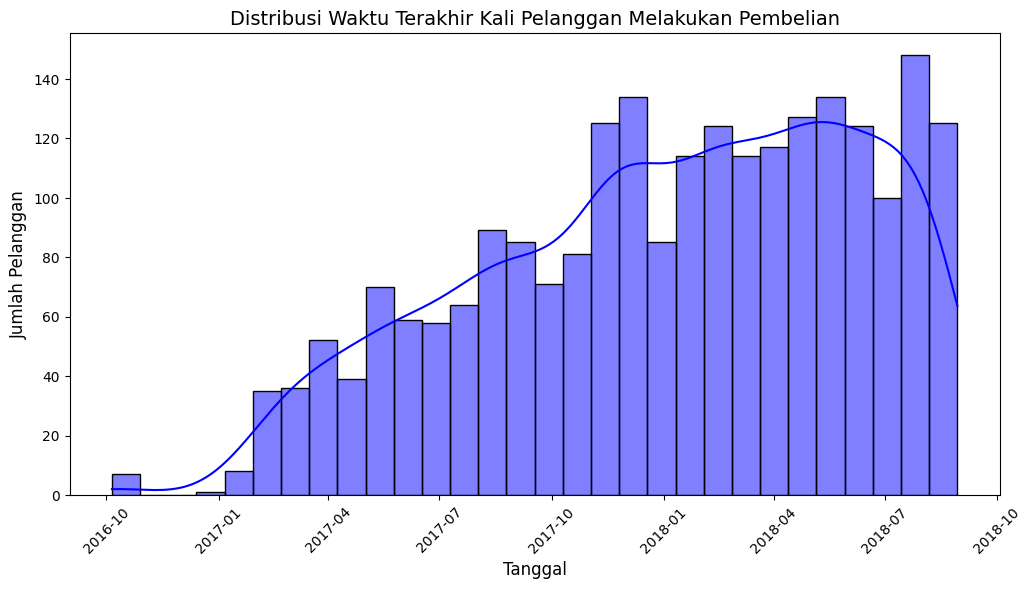

In [192]:
plt.figure(figsize=(12, 6))
sns.histplot(last_purchase["order_purchase_timestamp"], bins=30, kde=True, color="blue")
plt.title("Distribusi Waktu Terakhir Kali Pelanggan Melakukan Pembelian", fontsize=14)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Pelanggan", fontsize=12)
plt.xticks(rotation=45)  
plt.show()

**Insight:**
- Penurunan tajam terjadi dari Januari ke Februari dan dari Mei ke  pada tahun 2018, yang mungkin disebabkan oleh faktor musiman atau penurunan customer.
- Kategori produk yang paling laris menunjukkan bahwa pelanggan lebih tertarik pada produk seperti cama_mesa_banho, beleza_saude dsb. Sedangkan untuk produk yang kurang laris Perusahaan mungkin dapat melakukan promosi sebagai salah satu solusi. 
- Sebagian pelanggan berasal dari 3 kota besar yaitu rio de janeiro, sao paulo, dan belo horizonte, dimana hal ini menunjukkan bahwa pasar utama perusahaan saat ini berada di 3 kota ini.
- Jumlah pelanggan yang melakukan pembelian terakhir kali cenderung berfluktuasi setiap bulan dengan puncaknya pada bulan April dan Agustus 2018, serta penurunan signifikan pada bulan Juni dan September 2018.

## Conclusion

- Conclution pertanyaan 1 : Perusahaan perlu meningkatkan strategi pemasaran pada bulan seperti februari, april, juni dan juli yang mengalami penuruan pesanan dan memanfaatkan momen puncak dengan promosi yang lebih agresif.
- Conclution pertanyaan 2 : Perusahaan sebaiknya meningkatkan stok dan promosi produk terlaris serta melakukan evalusi strategi harga dan pemasaran untuk kategori produk yang kurang diminati.
- Conclution pertanyaan 3 : Perusahaan dapat lebih fokus memperkuat pasar di wilayah dengan pelanggan terbanyak serta mempertimbangkan ekspansi ke daerah dengan kepadatan pelanggan lebih rendah.
- Conclution pertanyaan 4 : Perusahaan mungkin perlu menerapkan strategi retensi seperti program loyalitas atau promosi khusus untuk mendorong pelanggan lama yang melakukan pembelian ulang.